# Portfolio Optimisation

In this project, we will build two $100,000 investment portfolios containing four stocks. The first portfolio will have an equal weighting between the stocks. The second portfolio will be optimised with a weighting allocation that provides the best return, adjusted for risk. To build these two portfolios, we will:

1. Import five years of data for four stocks
2. Build the initial portfolio with equal weighting to each of the stocks
3. Analyse and visualise the equal-weighted portfolio
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks
5. Identify the optimal portfolio from the scenarios and visualise the results

## Import Packages

In [1]:
# Import packages needed for the project
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from datetime import datetime, timedelta 

## Connect to Data

In [2]:
# Set start and end date parameters
end_date = datetime.today()
start_date = end_date - timedelta(5*365)

# List the four stock ticker symbols for the portfolio
stock_list = ['AMD', 'AAPL', 'MSFT', 'ORCL']

# Create an empty dictionary to store stock info
stocks = {}

# Loop through each stock in the stock_list and return the Adj Close
for i_stock in stock_list:
    data = yf.download(i_stock, start=start_date, end=end_date)[['Adj Close']]
    stock_data = pd.DataFrame(data)
    stocks[i_stock] = stock_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Examine the 'FRPT' Adj Close from the stocks dictionary
stocks['AMD'].head()

,Adj Close
Date,
2019-09-03,30.900000
2019-09-04,30.950001
2019-09-05,31.500000
2019-09-06,30.559999
2019-09-09,30.500000


## Create the Equal-Weighted Portolio

To create the equal-weighted portfolio, we need to add some additional columns to the DataFrame in the `stocks` dictionary. The three columns that we will build are:

- Normalised Return = Adjusted Close / Adjusted Close on the `startdate` of the portfolio
- Allocation = Normalised Return * 0.25 (equal weighting for each of the ten stocks)
- Position Value = Allocation * 100,000 (value of the portfolio)

In [4]:
# Create 'Normalised Return' column for each stock
for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data['Adj Close'].iloc[0] # Select the first row from the Adj Close column
    stock_data['Normalised Return'] = stock_data['Adj Close'] / first_adj_close

In [5]:
stocks['AAPL'].head()

,Adj Close,Normalised Return
Date,,
2019-09-03,49.761089,1.000000
2019-09-04,50.605366,1.016967
2019-09-05,51.594776,1.036850
2019-09-06,51.589939,1.036753
2019-09-09,51.810081,1.041177


In [6]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stocks.items():
    stock_data['Allocation'] = stock_data['Normalised Return'] * 0.25

In [7]:
stocks['MSFT'].head()

,Adj Close,Normalised Return,Allocation
Date,,,
2019-09-03,129.938583,1.000000,0.250000
2019-09-04,131.457291,1.011688,0.252922
2019-09-05,133.768738,1.029477,0.257369
2019-09-06,132.861359,1.022494,0.255623
2019-09-09,131.352219,1.010879,0.252720


In [8]:
# Set the value of the portfolio to $100k
for stock_name, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 100000

In [9]:
stocks['ORCL'].head()

,Adj Close,Normalised Return,Allocation,Position Value
Date,,,,
2019-09-03,47.930691,1.000000,0.250000,25000.000000
2019-09-04,48.928288,1.020813,0.255203,25520.332967
2019-09-05,49.731903,1.037580,0.259395,25939.487978
2019-09-06,49.103794,1.024475,0.256119,25611.874831
2019-09-09,50.378498,1.051070,0.262767,26276.743185


## Visualise the Portfolio Performance

To visualise the performance of the portfolio, we can create two line charts that show the return of the portfolio, and the return of the individual stocks, over time. Let's build a new DataFrame that contains, just the `position value` for each stock, as well as the total value for the portfolio. We can use this DataFrame to create the two visuals. 

In [10]:
# Create position_values dictionary
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [11]:
# Convert the position_values dictionary to a DataFrame
position_values = pd.DataFrame(data=position_values)

position_values.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-09-03,25000.000000,25000.000000,25000.000000,25000.000000
2019-09-04,25040.454001,25424.164965,25292.197136,25520.332967
2019-09-05,25485.437208,25921.245321,25736.916303,25939.487978
2019-09-06,24724.918967,25918.815191,25562.337835,25611.874831
2019-09-09,24676.375709,26029.414842,25271.981427,26276.743185


In [12]:
# Add 'Total' column to position values, summing the other columns
position_values['Total'] = position_values.sum(axis=1)

position_values.head()

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2019-09-03,25000.000000,25000.000000,25000.000000,25000.000000,100000.000000
2019-09-04,25040.454001,25424.164965,25292.197136,25520.332967,101277.149068
2019-09-05,25485.437208,25921.245321,25736.916303,25939.487978,103083.086810
2019-09-06,24724.918967,25918.815191,25562.337835,25611.874831,101817.946825
2019-09-09,24676.375709,26029.414842,25271.981427,26276.743185,102254.515164


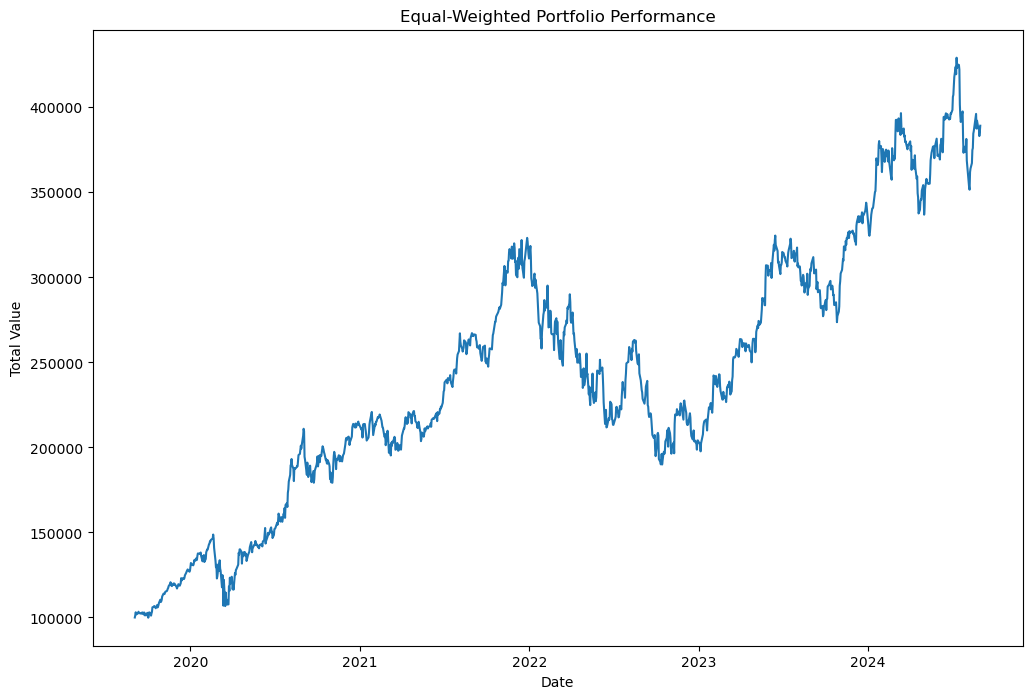

In [13]:
%matplotlib inline

# View the total portfolio
plt.figure(figsize=(12,8))

plt.plot(position_values['Total'])

plt.title('Equal-Weighted Portfolio Performance')

plt.xlabel('Date')

plt.ylabel('Total Value');

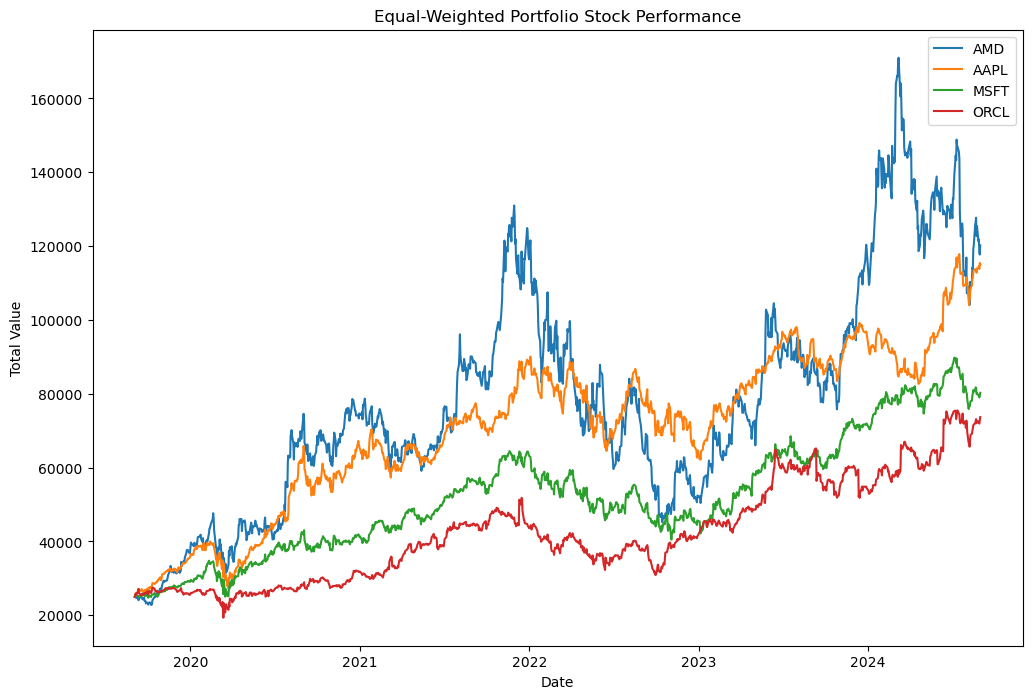

In [14]:
# View the ten stocks in the portfolio
plt.figure(figsize=(12,8))

plt.plot(position_values.iloc[:, 0:4])

plt.title('Equal-Weighted Portfolio Stock Performance')

plt.xlabel('Date')

plt.ylabel('Total Value')

plt.legend(position_values);

## Calculate Performance Metrics for the Portfolio

Now that we have created and visualised the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performance metrics:

- Cumulative Return
- Mean Daily Return
- Standard Deviation Daily Return
- Sharpe Ratio
- Annualised Sharpe Ratio

In [15]:
# Define the end and start value of the portfolio
end_value = position_values['Total'][-1]
start_value = position_values['Total'][0]

# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print(str(round(cumulative_return*100, 2)), '%')

289.2 %


In [16]:
# Create a 'Daily Returns' column
position_values['Daily Returns'] = position_values['Total'].pct_change()

position_values.head()

,AMD,AAPL,MSFT,ORCL,Total,Daily Returns
Date,,,,,,
2019-09-03,25000.000000,25000.000000,25000.000000,25000.000000,100000.000000,NaN
2019-09-04,25040.454001,25424.164965,25292.197136,25520.332967,101277.149068,0.012771
2019-09-05,25485.437208,25921.245321,25736.916303,25939.487978,103083.086810,0.017832
2019-09-06,24724.918967,25918.815191,25562.337835,25611.874831,101817.946825,-0.012273
2019-09-09,24676.375709,26029.414842,25271.981427,26276.743185,102254.515164,0.004288


In [17]:
# Calculate the mean Daily Return
mean_daily_return = position_values['Daily Returns'].mean()

print('The mean daily return is:', str(mean_daily_return))

The mean daily return is: 0.001279433435906799


In [18]:
# Calculate the standard deviation of Daily Return
std_daily_return = position_values['Daily Returns'].std()

print('The mean daily return is:', str(round(std_daily_return, 4)))

The mean daily return is: 0.0199


## Sharpe Ratio

Now, let's explore a risk-adjusted return metric called the sharpe ratio. The sharpe ratio helps us to quantify how much return we are getting for a given level of risk. When comparing two different investments, the asset with the higher sharpe ratio provides a return for the same amount of risk or the same return for a lower amount of risk. 

It is calculated by taking the average return of the portfolio, minus a risk free rate (such as government bonds), divided by the standard deviation of the return. In this case, we assume the risk-free rate is close to 0 so we won't add it to the formula. 

In [19]:
# Calculate the sharpe ratio
sharpe_ratio = mean_daily_return / std_daily_return

sharpe_ratio

0.06431437051675759

In [20]:
# Calculare the annualized sharpe ratio
sharpe_ratio_annualised = sharpe_ratio * 252**0.5

sharpe_ratio_annualised

1.0209589806900314

## Prepare Scenarios to Optimise Portfolio Weighting

We need to prepare our data ahead of generating our scenarios to optimise the portfolio weighting. We will:

 - Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
 - Create another dictionary that transforms the adjusted close for each day to percent change from the previous day. 

In [21]:
# Create stock_adj_close dictionary
stock_adj_close = {}

for stock_name, stock_data in stocks.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']

In [22]:
# Convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data=stock_adj_close)

stock_adj_close.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-09-03,30.900000,49.761089,129.938583,47.930691
2019-09-04,30.950001,50.605366,131.457291,48.928288
2019-09-05,31.500000,51.594776,133.768738,49.731903
2019-09-06,30.559999,51.589939,132.861359,49.103794
2019-09-09,30.500000,51.810081,131.352219,50.378498


In [23]:
# Create stock_returnn DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-09-03,NaN,NaN,NaN,NaN
2019-09-04,0.001618,0.016967,0.011688,0.020813
2019-09-05,0.017771,0.019551,0.017583,0.016424
2019-09-06,-0.029841,-0.000094,-0.006783,-0.012630
2019-09-09,-0.001963,0.004267,-0.011359,0.025959


## Build & Run 10,000 Portfolio Scenarios

Now that we have prepared our data, we are almost ready to run scenarios. First, we need to build the structures required to generate these scenarios and store the output. To do this, we will use the numpy.zeros() function.
This function creates arrays that are filled with zeros. After we run the scenarios, we replace these zeros with the corresponding output. The reason we create the arrays with zeros first is to give our arrays the correct shape before we replace them with the correct values.

We will create four different arrays:
 - weights_array - this array will have 10,000 rows and 4 columns and hold the weighting allocation for each stock.
 - returns_array - this array will contain the portfolio return for each scenario.
 - volatility_array - this array will contain the portfolio volatility for each scenario
 - sharpe_array - this array will contain the sharpe ratio for each scenario


In [24]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [25]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [26]:
# Import the random package and set the seeds
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios):
# Generate four random numbers for each index
    numbers = np.array(np.random.random(4))

# Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)

# Save the weights in weights_array
    weights_array[index,:] = weights
    
# Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)

# Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

# Calculate the Sharpe Ratio for each scenario
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [27]:
print("The first combination:", weights_array[0])

The first combination: [0.26728964 0.34364796 0.14116943 0.24789297]


In [28]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 1.1512827545827569


## Identify the Optimal Portfolio


Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [29]:
# Find the highest sharpe ratio in sharpe_array
sharpe_array.max()

1.1912661215581515

In [30]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

4670

In [31]:
# Pring the optimal weights for each stock 
print(stock_list)
print(weights_array[index_max_sharpe,:])

['AMD', 'AAPL', 'MSFT', 'ORCL']
[0.11511046 0.62197139 0.02434449 0.23857366]


## Visualise the Optimal Portfolio and Portfolio Scenarios

Let us visualise our portfolio scenarios by using a scatter chart. We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we can visualise where the optimal portfolio appears among all the scenarios. 

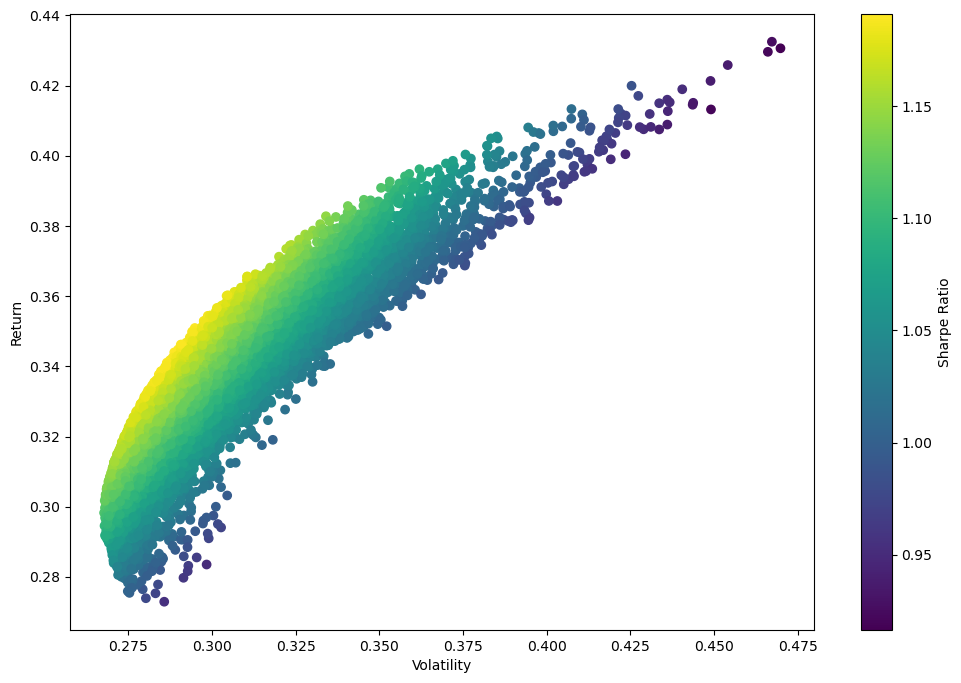

In [32]:
# Visualise volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt. scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')
plt. colorbar(label='Sharpe Ratio')
plt. xlabel('Volatility')
plt.ylabel ('Return');

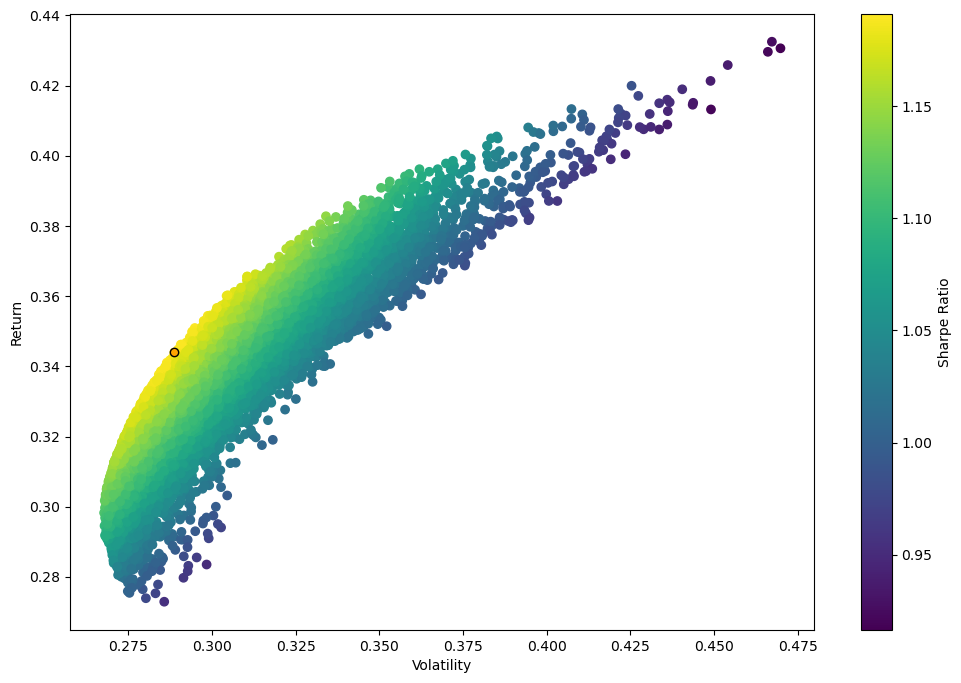

In [33]:
# Identigy the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Visualise volatility vs retuns for each scenario
plt.figure(figsize=(12,8))

plt. scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')
plt. colorbar(label='Sharpe Ratio')
plt. xlabel('Volatility')
plt.ylabel ('Return');

# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolors='black');